<a href="https://colab.research.google.com/github/heidaralavi/Gas-Prj/blob/main/loading_fit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [3]:
url = 'https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/total.csv'
df=pd.read_csv(url)
#df=pd.read_csv('input-data.csv')
df.head()

,Unnamed: 0,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
0,0,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
1,1,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2,2,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0
3,3,8.850536,2028.555556,66.986667,21.990000,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772.0
4,4,9.006061,2034.181818,67.096667,21.846667,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120.0


In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
col=df.columns
data=df.values

In [6]:
# split into input and output elements
X, y =data[:, :-1], data[:, -1]

In [9]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_test.shape,X_train.shape)

(251, 18) (585, 18)


وارد شدن به گوگل درایو

In [24]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

آیدی فایل را از روی لینکی که برای ارسال فایل در گوگل درایو ساختیم بر می داریم
سپس به نام دلخواه اینجا سیو می کنیم

In [26]:
fileDownloaded = drive.CreateFile({'id':'1EmGsZzv28VBjeeLztuLM-nDN6-u3uqkj'})

In [27]:
fileDownloaded.GetContentFile('finalized_model.sav')


لود کردن فایل توسط pickle

In [30]:
with open('finalized_model.sav', 'rb') as f:
    model = pickle.load(f)

[18:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


و ادامه ی کار بدون فیت کردن داده ها

In [31]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 89.82 %



In [35]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 89.82%
Mean Absolute Error 4795.05
Mean Squared Error 37114064.28


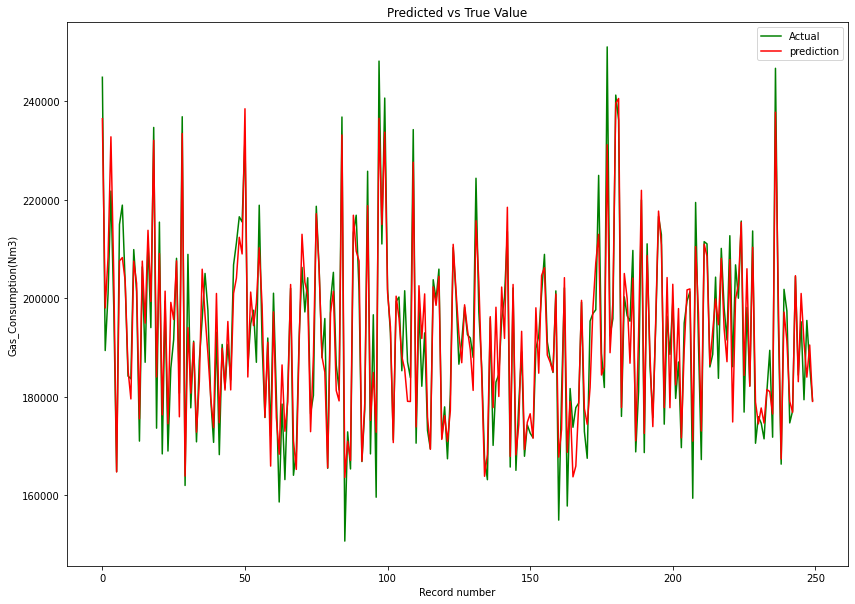

In [36]:
plt.figure(figsize=(14,10))
plt.plot(range(250),y_test[0:250], color = "green")
plt.plot(range(250),model.predict(X_test[0:250]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()